## Introduction

This project employs exploratory data analysis to explore and interpret the data provided by the public New York City Airbnb dataset. 

Airbnb is an online marketplace that enables hosts to rent out their homes or properties to guests as an alternative to traditional hotels and inns. The dataset explored here provides data on pricing, location, reviews, amenities, and other information about Airbnb listings in the New York City area. 

This analysis explores current market rate and popular features of AirBnB listings in New York City in order to advise potential hosts as to what pricing and features they should use in their listings. 

Code for this notebook was almost entirely written in Python; HTML was used to optionally hide code blocks to increase the notebook's readability. 

In [1]:
%%HTML 
<script>
    function luc21893_refresh_cell(cell) {
        if( cell.luc21893 ) return;
        cell.luc21893 = true;
        console.debug('New code cell found...' );
        
        var div = document.createElement('DIV');            
        cell.parentNode.insertBefore( div, cell.nextSibling );
        div.style.textAlign = 'right';
        var a = document.createElement('A');
        div.appendChild(a);
        a.href='#'
        a.luc21893 = cell;
        a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

        cell.style.visibility='hidden';
        cell.style.position='absolute';
        a.innerHTML = '[show code]';        
                
    }
    function luc21893_refresh() {                
        if( document.querySelector('.code_cell .input') == null ) {            
            // it apeears that I am in a exported html
            // hide this code
            var codeCells = document.querySelectorAll('.jp-InputArea')
            codeCells[0].style.visibility = 'hidden';
            codeCells[0].style.position = 'absolute';                        
            for( var i = 1; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i].parentNode)
            }
            window.onload = luc21893_refresh;
        }                 
        else {
            // it apperas that I am in a jupyter editor
            var codeCells = document.querySelectorAll('.code_cell .input')
            for( var i = 0; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i])
            }            
            window.setTimeout( luc21893_refresh, 1000 )
        }        
    }
    
    function luc21893_toggle(a) {
        if( a.luc21893.style.visibility=='hidden' ) {
            a.luc21893.style.visibility='visible';        
            a.luc21893.style.position='';
            a.innerHTML = '[hide code]';
        }
        else {
            a.luc21893.style.visibility='hidden';        
            a.luc21893.style.position='absolute';
            a.innerHTML = '[show code]';
        }
    }
    
    luc21893_refresh()
</script>

## Initial Exploration of the Dataset

Preliminary analysis explored how different features affected the pricing of NYC Airbnb listings. 

To begin exploration of the data, the Python data analysis library Pandas was imported for use. 

In [19]:
import pandas as pd

In [20]:
listings = pd.read_csv('data/airbnb_nyc.csv', delimiter=',')

In [21]:
#Obtaining a preliminary look at our dataframe through .head() method
listings.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [22]:
#how large is our dataset?
listings.shape

(30179, 81)

In [23]:
#taking a look at the column/variable names and types
listings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

Looking at the column names, I'm not immediately certain what each of them mean. To solve this problem, before we go further, we should investigate the data dictionary for this dataset, located [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

Looking closely at the data dictionary gives us key information about some of the less self-explanatory column names. Below, I've shed some light on the meaning of a few key columns that I'll use in my exploration later. 

**availability_x:** (e.g., availability_30, availability_60, etc.) The availability of the listing x days in the future as determined by the calendar. Note: a listing may not be available because it has been booked by a guest or blocked by the host.

**number_of_reviews:** The number of reviews the listing has.

**number_of_reviews_ltm:** The number of reviews the listing has in the last 12 months.

**calculated_host_listings_count:** The number of listings the host has in the current scrape, in the city/region geography.

In [24]:
#filter the output to show which have more than 10 reviews
#and a rating below 65
listings[(listings["number_of_reviews"] > 10) & (listings['review_scores_rating'] < 65)]

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
10555,15733597,Bright and Charming Private Room in Williamburg!,My place is surrounded by cool cafe's and bars...,My place is surrounded by cool cafe's and bars...,none,NaN,NaN,- Please be mindful of other roommates after 9...,57109253,42402.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
22847,31097777,Quiet One-Bedroom in Williamsburg Close to Subway,"This is a one-bedroom apartment in a quiet, re...","This is a one-bedroom apartment in a quiet, re...",none,Brunch and bike away the day and lounge and dr...,The J and M trains are both 2 minutes away. Th...,=- please no parties or smoking. This will res...,115064362,42771.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
24233,32546490,Dandy Budget Private Room,Offering safe comfortable private room in my 3...,Offering safe comfortable private room in my 3...,none,NaN,NaN,NaN,220149091,43384.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [25]:
#How many listings received different ratings?
listings['review_scores_rating'].value_counts()

100.0    9173
80.0     1330
90.0     1202
93.0     1182
98.0     1051
96.0     1006
95.0      942
97.0      863
94.0      471
87.0      466
92.0      409
91.0      378
99.0      366
60.0      305
89.0      274
88.0      266
85.0      194
84.0      152
83.0      128
70.0      125
86.0      115
73.0       94
40.0       84
20.0       83
75.0       66
82.0       62
76.0       40
78.0       39
67.0       37
77.0       35
50.0       35
72.0       18
81.0       15
74.0       15
68.0       10
79.0        9
65.0        8
64.0        6
55.0        6
69.0        5
63.0        5
71.0        4
47.0        4
30.0        3
53.0        3
45.0        2
33.0        2
57.0        2
62.0        2
44.0        1
66.0        1
Name: review_scores_rating, dtype: int64

In [26]:
#Look at which columns contain NaN
nan_results = listings.isna().any()
nan_results
#True indicates that there are some NaN values within that column

id                     False
name                    True
summary                 True
description             True
experiences_offered    False
                       ...  
secure                 False
self_check_in          False
smoking_allowed        False
accessible             False
event_suitable         False
Length: 81, dtype: bool

In [27]:
#view only the columns that do have NaN
listings.columns[listings.isna().any()].tolist()

['name',
 'summary',
 'description',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [28]:
#view only the columns that do NOT have NaN
listings.columns[~listings.isna().any()].tolist()

['id',
 'experiences_offered',
 'host_id',
 'street',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'white_goods',
 'elevator',
 'gym',
 'child_friendly',
 'parking',
 'outdoor_space',
 'host_greeting',
 'hot_tub_sauna_or_pool',
 'internet',
 'long_term_stays',
 'pet

In [29]:
#view only those listings that contain numerical data
numerical_var = list(listings.select_dtypes(include = [float, int])) 
numerical_var

['id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 '

The good news about the NaNs is that, at least for exploratory data analysis, I am not concerned with most of the columns that contain NaNs. Luckily, the variables that I'm most interested in, such as ```price```, ```accommodates```, ```bedrooms```, and ```bathrooms```, all do not contain NaNs. Still, I do want to investigate how many NaNs we are dealing with.  

In [30]:
#counting null values
pd.isnull(listings).sum()[pd.isnull(listings).sum() > 0]

name                              13
summary                         1218
description                      604
neighborhood_overview          12066
transit                        11989
house_rules                    13556
host_since                         9
host_response_time             13097
host_response_rate             13097
host_is_superhost                  9
host_listings_count                9
host_identity_verified             9
neighbourhood                      9
review_scores_rating            9085
review_scores_accuracy          9111
review_scores_cleanliness       9101
review_scores_checkin           9129
review_scores_communication     9110
review_scores_location          9132
review_scores_value             9130
reviews_per_month               8260
dtype: int64

We can drop some of the columns right off the bat that we know will not be useful in our analysis. 

Unless we had set out to do language sampling and analyze keywords, we are not interested in the ```summary```, ```description```, or ```neighborhood overview``` (although a keyword analysis might lead to interesting insights in another project!). The ```name``` of the listing is also not going to yield anything useful. 

We can therefore delete those columns. 

In [31]:
# remove summary, decription, and name columns from the dataframe
listings = listings.drop(['summary', 'description', 'name', 'neighborhood_overview'], axis = 1)

In [52]:
#inspecting 'neighbourhood' column
listings['neighbourhood'].head(10)

0     Brooklyn
1       Harlem
2       Harlem
3     Brooklyn
4    Manhattan
5     Flatbush
6     Brooklyn
7     Flatbush
8     Brooklyn
9    Manhattan
Name: neighbourhood, dtype: object

I've also decided to drop the ```neighbourhood``` column since we already have information about latitude and longitude. (It also looks as though hosts may label the neighborhoods themselves. For example, Flatbush is located in Brooklyn and Harlem is located in Manhattan. The data are therefore a little bit inconsistent.)

In [53]:
listings = listings.drop(['neighbourhood'], axis = 1)

In [55]:
listings['transit'].head()

0    Very close to F and G trains and Express bus i...
1                                                  NaN
2                                                  NaN
3    Ten minutes walk to the 15th sheet F&G train s...
4                                         Metro 1 et A
Name: transit, dtype: object

In [56]:
listings['house_rules'].head()

0    -The security and comfort of all our guests is...
1    Upon arrival please have a legibile copy of yo...
2                                                  NaN
3    - No shoes in the house - Quiet hours after 11...
4                                                  NaN
Name: house_rules, dtype: object

The ```transit``` and ```house_rules``` columns contain lengthy strings. Like the other descriptive columns, they will not be useful predictors unless we are doing Natural Language Processing as part of our analysis. They will be dropped as well. 

In [57]:
listings = listings.drop(['transit', 'house_rules'], axis = 1)

In [58]:
pd.isnull(listings).sum()[pd.isnull(listings).sum() > 0]

host_since                         9
host_response_time             13097
host_response_rate             13097
host_is_superhost                  9
host_listings_count                9
host_identity_verified             9
review_scores_rating            9085
review_scores_accuracy          9111
review_scores_cleanliness       9101
review_scores_checkin           9129
review_scores_communication     9110
review_scores_location          9132
review_scores_value             9130
reviews_per_month               8260
dtype: int64

Recall that we have 30,179 rows in our dataset. Removal of over 8,000 rows would cause the loss of too much valuable data. However, we might be able to remove the rows in the 4 columns that contain 9 missing values each. Perhaps they might even be the same 9 rows. Let's see!



In [59]:
listings[listings['host_since'].isna()]

,id,experiences_offered,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
2443,4446862,none,23077718,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY, United States",...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
2746,4763327,none,24576978,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY, United States",...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
4227,6992973,none,5162530,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY, United States",...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
4685,7556587,none,39608626,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY, United States",...,-1,1,-1,-1,-1,-1,-1,-1,1,-1
7323,10709846,none,7822683,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY, United States",...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7679,11553543,none,26138712,NaN,NaN,NaN,NaN,NaN,NaN,"Queens, NY, United States",...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
15144,21787094,none,415290,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY, United States",...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
16823,23660605,none,177146433,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY, United States",...,-1,1,1,-1,-1,-1,-1,1,-1,-1
22062,30468335,none,228750026,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY, United States",...,-1,1,1,-1,-1,-1,-1,-1,-1,-1


It does look like they are the same 9 rows. Let's drop them; there are just 9, and we may want to work with information about the host, which the missing values may interfere with.

In [61]:
listings.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified'], inplace=True)

In [62]:
#check NaN-containing rows again
pd.isnull(listings).sum()[pd.isnull(listings).sum() > 0]

host_response_time             13088
host_response_rate             13088
review_scores_rating            9080
review_scores_accuracy          9106
review_scores_cleanliness       9096
review_scores_checkin           9124
review_scores_communication     9105
review_scores_location          9127
review_scores_value             9125
reviews_per_month               8256
dtype: int64

Let's investigate the contents of these other columns that contain NaNs. 

In [39]:
listings['host_response_time'].head()

0    within an hour
1      within a day
2      within a day
3    within an hour
4               NaN
Name: host_response_time, dtype: object

In [90]:
listings['host_response_time'].unique()

array(['within an hour', 'within a day', nan, 'within a few hours',
       'a few days or more'], dtype=object)

In [95]:
listings['host_response_time'].value_counts(dropna=False)

NaN                   13088
within an hour         8872
within a few hours     4474
within a day           3036
a few days or more      700
Name: host_response_time, dtype: int64

It strikes me that I could make a new boolean column called something like "responds_within_hours" with 1.0 values for the "within an hour" and "within a few hours" entries within `host_response_time` and 0.0 for the other entries (including NaNs). However, I am not sure where the NaNs are actually coming from. We already have information about the host response rate, and too many columns risks overfitting an eventual model. I'm choosing to remove the `host_response_time` column instead. 

In [96]:
listings = listings.drop(['host_response_time'], axis = 1)

Our data dictionary tells us nothing about what ```review_scores_accuracy``` means, but visiting a listing on the AirBnB website tells us that this rating is associated with how accurate the guest found the listing/description. 

In [99]:
listings['review_scores_accuracy'].median()

10.0

In [100]:
listings['review_scores_accuracy'].mean()

9.698077560490553

In [101]:
len(listings[listings['review_scores_accuracy']==10])

24617

In [102]:
len(listings[listings['review_scores_accuracy']==9])

3642

In [103]:
len(listings[listings['review_scores_accuracy']==8])

1232

In [104]:
len(listings[listings['review_scores_accuracy']==7])

247

In [105]:
len(listings[listings['review_scores_accuracy']==6])

249

In [106]:
len(listings[listings['review_scores_accuracy']<6])

183

It seems unlikely that review_scores_accuracy is going to be a crucial variable for us, but I've decided to impute its missing values with the median value for the column, which is 10.0. It is by far the most common rating, as seen above. 

In [107]:
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna(10)

In [108]:
listings['host_response_rate'].head()

0    1.00000
1    1.00000
2    1.00000
3    1.00000
4    0.91336
Name: host_response_rate, dtype: float64

In [109]:
listings['host_response_rate'].median()

0.9133602622643426

In [110]:
listings['host_response_rate'].mean()

0.9133602622642979

In [111]:
len(listings[listings['host_response_rate'] == 1])

10901

In [112]:
len(listings[listings['host_response_rate'] > 0.9])

25915

In [113]:
listings['host_response_rate'].unique()

array([1.        , 0.91336026, 0.67      , 0.3       , 0.6       ,
       0.8       , 0.9       , 0.        , 0.88      , 0.69      ,
       0.5       , 0.92      , 0.63      , 0.83      , 0.2       ,
       0.94      , 0.93      , 0.78      , 0.96      , 0.25      ,
       0.86      , 0.95      , 0.7       , 0.75      , 0.71      ,
       0.89      , 0.33      , 0.85      , 0.22      , 0.4       ,
       0.43      , 0.29      , 0.57      , 0.13      , 0.84      ,
       0.77      , 0.79      , 0.44      , 0.46      , 0.97      ,
       0.54      , 0.56      , 0.58      , 0.64      , 0.98      ,
       0.91      , 0.87      , 0.73      , 0.27      , 0.1       ,
       0.62      , 0.68      , 0.82      , 0.53      , 0.59      ,
       0.81      , 0.14      , 0.99      , 0.19      , 0.38      ,
       0.52      , 0.47      , 0.39      , 0.65      , 0.74      ,
       0.41      , 0.72      , 0.34      , 0.45      , 0.55      ,
       0.17      , 0.07      , 0.36      , 0.66      , 0.42   

In [114]:
listings.shape

(30170, 73)

Over a third of ```host_response_rate``` values are 1.0. A look at the AirBnB website tells us that the response rate measures how consistently a host responds within 24 hours to guest inquiries and booking requests. Thus, a 1.0 would indicate that the host responds within 24 hours 100% of the time. It may not even be a useful factor for us to consider, but I've chosen to impute the mean in this case so as not to inflate all missing values to 100%. 

In [115]:
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mean())

In [116]:
#let's take another look at NaN-containing rows
pd.isnull(listings).sum()[pd.isnull(listings).sum() > 0]

review_scores_rating           9080
review_scores_cleanliness      9096
review_scores_checkin          9124
review_scores_communication    9105
review_scores_location         9127
review_scores_value            9125
reviews_per_month              8256
dtype: int64

## Which features affect price? 

Make a histogram for ```price``` variable.

To begin plotting our data, we will import the seaborn library and matplotlib pyplot module. 

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Frequency of NYC AirBnB Listing Price Ranges')

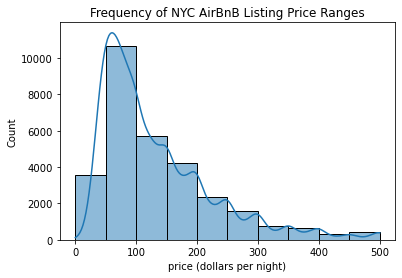

In [14]:
sns.histplot(
    data = listings,
    x = 'price',
    binwidth = 50, 
    palette = 'pastel',
    kde = True
)
plt.xlabel("price (dollars per night)")
plt.title('Frequency of NYC AirBnB Listing Price Ranges')

The histogram clearly shows that NYC Airbnb prices below $100 per night seem to be most popular. 

Below is another histogram for ```price``` for listings that are long-term stays vs. short-term. 

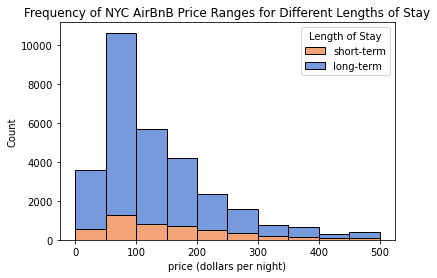

In [15]:
sns.histplot(
    data = listings,
    x = 'price',
    hue = 'long_term_stays',
    binwidth = 50,
    palette = 'muted',
    multiple = 'stack'
)
plt.xlabel("price (dollars per night)")
plt.title('Frequency of NYC AirBnB Price Ranges for Different Lengths of Stay')
plt.legend(
    title = 'Length of Stay', 
    labels = ['short-term', 'long-term']
)

It looks as though many more listings are offered as possible long-term stays than not. Both short- and long-term stay listings appear to follow a similar pattern in terms of pricing, with the most common pricing for a listing somewhere between 50 and 100 dollars per night. 

Below are box plots for prices for each number of ```bedrooms```.

Text(0.5, 1.0, 'Price for Number of Bedrooms')

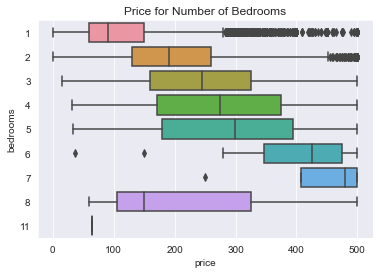

In [16]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.boxplot(
    data = listings,
    x = 'price',
    y = 'bedrooms', 
    orient = "h"
    )
plt.title('Price for Number of Bedrooms')

The boxplots show us that the median listing prices increase as the number of bedrooms increase, until we get to the point of 8 or more bedrooms offered. There may be comparatively few listings that offer such a sizable number of bedrooms, so the chart may be misleading. 

In [17]:
listings[listings['bedrooms'] >= 8]

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
6100,9427868,Grand Home On Kissena Park in Flushing NYC,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...",none,Quiet neighborhood right beside Kissena Park w...,Both Q27 and Q65 to Downtown Flushing in 10 mi...,No illegal activity shall be allowed at premis...,23234988,41945.0,...,-1,1,1,-1,-1,-1,1,-1,1,1
10250,15107136,GAMBA Z's Artist Residency for Traveling Artists,GAMBA Z's Artist Residency is in the midst of ...,GAMBA Z's Artist Residency is in the midst of ...,none,NaN,We are two blocks from the L train at Montrose...,NaN,19187413,41850.0,...,-1,1,-1,-1,-1,-1,-1,1,-1,-1
16529,23124338,New York Guests House,"Beautiful peaceful, quiet, clean 11 private r...","Beautiful peaceful, quiet, clean 11 private r...",none,NaN,NaN,NaN,171830071,43136.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
27556,34976037,Stunning Studio in Lux Building in the UWS #6115,Stay in one of the finest luxury rentals in a ...,Stay in one of the finest luxury rentals in a ...,none,NaN,NaN,NaN,116305897,42779.0,...,1,1,1,1,1,-1,1,-1,-1,-1


Indeed, we see that there are only 4 listings total that offer such a high number of bedrooms, so we should disregard them as they offer only a very small sample size. 

Due to high number of outliers apparent in the above boxplots for 1 and 2 bedroom listings, I decided to investigate the distribution of 1 and 2 bedroom prices by making histograms for each.

<AxesSubplot:xlabel='price', ylabel='Count'>

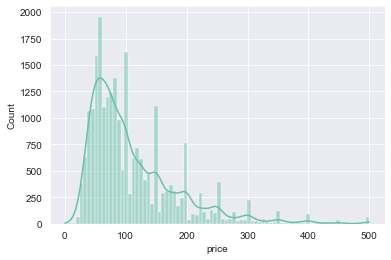

In [18]:
sns.histplot(
    data = listings[listings["bedrooms"] == 1],
    x = "price", 
    kde = True
)

<AxesSubplot:xlabel='price', ylabel='Count'>

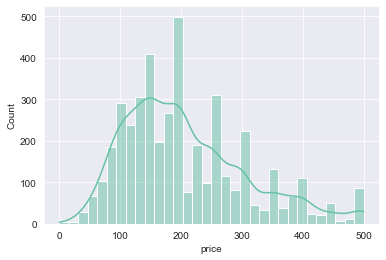

In [19]:
sns.histplot(
    data = listings[listings["bedrooms"] == 2],
    x = "price", 
    kde = True
)

The distribution for prices for 2-bedroom AirBnB listings is still right-skewed, but with a less lengthy/extreme tail than we saw for the 1-bedroom listings. 

Again, the fact that the price points are often chosen by hosts to be at increments of 50 and 100 dollars also changes the look of our data. Choosing a different bin width, such as in the histogram below, removes the appearance of what look like possible separate peaks in the data due to this pricing choice pattern. 

The histogram below is exactly the same as the one directly above, but with a binwidth of 50 dollars rather than the default of 10 dollars. 

<AxesSubplot:xlabel='price', ylabel='Count'>

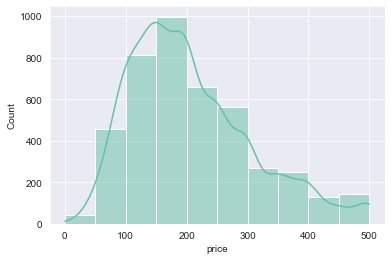

In [20]:
sns.histplot(
    data = listings[listings["bedrooms"] == 2],
    x = "price", 
    binwidth = 50,
    kde = True
)

Below are box plots that compare price and the number of guests accommodated. 

Text(0.5, 1.0, 'Price for Number of Guests Accommodated')

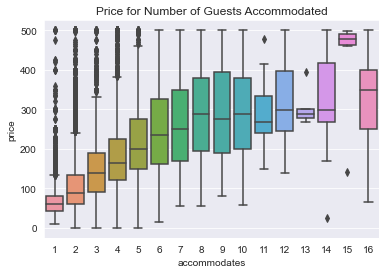

In [21]:
sns.boxplot(
    data = listings,
    y = 'price',
    x = 'accommodates'
    )
plt.title('Price for Number of Guests Accommodated')

The boxplots show us that the middle 50% of prices for each number of guests accommodated increases up until around 8-10 guests, and then the pricing seems to level off somewhat. 

The steady upward trajectory in price from 1 guest to around 8 guests suggests a positive correlation between the "price" and "accommodates" columns. We'll look into that in a bit!

Let's take a closer look at the data for listings that accommodate 1 guest. The boxplot above shows a significant number of outliers, implying that the price for 1 guest is not normally distributed; perhaps there is more than one peak, or perhaps the data just skews to the right. 

Text(0.5, 1.0, 'Price Distribution for Listings that Accommodate 1 Guest')

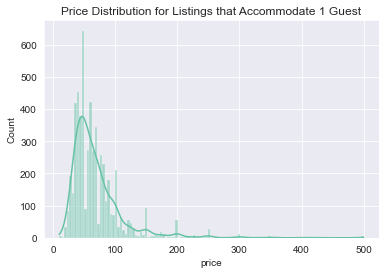

In [22]:
sns.histplot(
    data = listings[listings["accommodates"] == 1],
    x = "price", 
    kde = True
)
plt.title('Price Distribution for Listings that Accommodate 1 Guest')

Again, it looks like our data is right-skewed, with a lot of prices at 50- and 100-dollar increments. 

Let's look at the same time of histogram for listings that accommodate 2 guests:

Text(0.5, 1.0, 'Price Distribution for Listings that Accommodate 2 Guests')

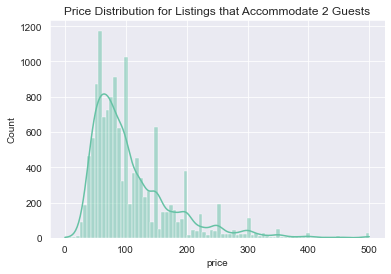

In [23]:
sns.histplot(
    data = listings[listings["accommodates"] == 2],
    x = "price", 
    kde = True
)
plt.title('Price Distribution for Listings that Accommodate 2 Guests')

Once again, we see a right skew to the data, indicating several price points that are in a more expensive range than most of the listings. 

It makes sense that our data for ```price``` vs. ```bedrooms``` and ```price``` vs. ```accommodates``` take similar shapes, as more bedrooms will often mean more guests can be accommodated.

Next, I explored the relationship between ```price``` and ```host_is_superhost```, positing that superhosts may charge more for their listings.

Text(0.5, 1.0, 'Price for Superhost vs. Non-superhost')

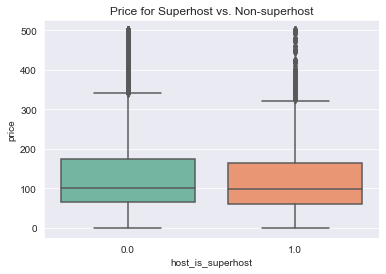

In [24]:
sns.boxplot(
    data = listings,
    y = 'price',
    x = 'host_is_superhost'
    )
plt.title('Price for Superhost vs. Non-superhost')

The boxplots for non-superhosts (value 0, shown here in green) and superhosts (value 1, shown here in orange), do not look all that different, therefore it seems I was wrong that this factor would have a significant impact on price. 

To investigate further, I chose to plot ```price``` and ```host_is_superhost``` in a histogram next.

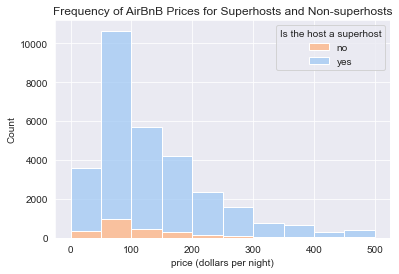

In [25]:
#plt.figure(figsize = (15,7))
sns.histplot(
    data = listings,
    x = 'price',
    hue = 'host_is_superhost',
    palette = 'pastel',
    binwidth = 50,
    multiple = 'stack'
)
plt.xlabel("price (dollars per night)")
plt.title('Frequency of AirBnB Prices for Superhosts and Non-superhosts')
plt.legend(title = 'Is the host a superhost', labels = ['no', 'yes'])

The histogram shows clearly that we have many more hosts designated as superhosts than not. Although there are comparatively few non-superhosts, the pricing of their listings seem to follow a similar distribution, peaking between 50 and 100 dollars and skewed to the right. 

I also explored if offering breakfast seemed to affect the pricing of listings.

Text(0.5, 1.0, 'Price if Breakfast')

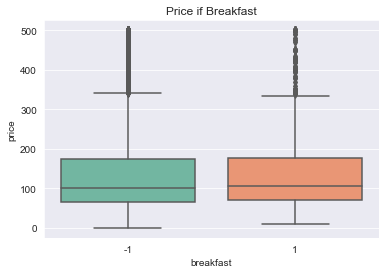

In [26]:
sns.boxplot(
    data = listings,
    y = 'price',
    x = 'breakfast'
    )
plt.title('Price if Breakfast')

Looking at the boxplots above, it seems at a glance that offering breakfast didn't have a particularly strong impact on pricing, since both boxplots look remarkably similar. 

A more efficient way to explore correlation between price and other variables is to make a correlation matrix, which was my next move. 

In [27]:
correlation = listings.corr()

In [28]:
#Sorting variables positively correlated with price from most to least correlation
pos_corr = correlation["price"] > 0
correlation["price"][pos_corr].sort_values(ascending = False).to_frame()

,price
price,1.000000
accommodates,0.571541
bedrooms,0.454539
beds,0.421355
guests_included,0.321970
tv,0.271563
elevator,0.229610
calculated_host_listings_count_entire_homes,0.218890
white_goods,0.214283
gym,0.209892


In [29]:
##Sorting those negatively correlated with price from most to least correlation
neg_corr = correlation["price"] < 0
correlation["price"][neg_corr].sort_values(ascending = True).to_frame()

,price
longitude,-0.294196
calculated_host_listings_count_private_rooms,-0.127504
calculated_host_listings_count_shared_rooms,-0.101389
smoking_allowed,-0.054131
host_greeting,-0.051356
number_of_reviews,-0.029229
host_identity_verified,-0.022861
parking,-0.019383
host_is_superhost,-0.016325
number_of_reviews_ltm,-0.011481


In [30]:
#I can also select just a handful of columns to look at in a correlation matrix
listings[['price', 'bedrooms', 'accommodates', 'tv', 'elevator','number_of_reviews', 'review_scores_rating']].corr()

,price,bedrooms,accommodates,tv,elevator,number_of_reviews,review_scores_rating
price,1.000000,0.454539,0.571541,0.271563,0.229610,-0.029229,0.064228
bedrooms,0.454539,1.000000,0.704425,0.122829,-0.045297,0.001883,0.002224
accommodates,0.571541,0.704425,1.000000,0.218900,0.049669,0.055434,-0.008836
tv,0.271563,0.122829,0.218900,1.000000,0.127951,0.019464,0.057718
elevator,0.229610,-0.045297,0.049669,0.127951,1.000000,-0.069502,0.034460
number_of_reviews,-0.029229,0.001883,0.055434,0.019464,-0.069502,1.000000,0.066106
review_scores_rating,0.064228,0.002224,-0.008836,0.057718,0.034460,0.066106,1.000000


In reviewing these correlations, I was surprised that some features such as "event_suitable", "parking", and "hot_tub_sauna_or_pool" weren't more positively correlated with price, but it made sense that "accommodates" and "bedrooms" were highly correlated. 

I think the explanation for some of the "fancy extra" features not resulting in more of a price hike is that it's really about location, location, location, and places that are closer to major attractions or in the middle of cities are less likely to have these kinds of amenities, but are more likely to be highly sought-after and expensive.

As a result, I investigated the effects of geographic location on price using geographic visualization.

## Location and Pricing

In [31]:
import folium
from folium.plugins import HeatMap

In [32]:
#to center my map at the median latitude and longitude
listings[['latitude', 'longitude']].median()

latitude     40.72145
longitude   -73.95528
dtype: float64

In [33]:
loc = 'NYC AirBnB Listing Prices'
title_html = f'<h3 align="center">{loc}</h3>'  

folium_map = folium.Map(
    location = [40.72145, -73.95528], #latitude, longitude of map's center
    tiles = 'OpenStreetMap', #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 9) #default is 10

folium_map.add_child(
    HeatMap(
        listings[['latitude', 'longitude', 'price']],
        radius = 6,
        min_opacity = 0.2,
        blur = 6
    )
) 

folium_map.get_root().html.add_child(folium.Element(title_html))

folium_map

This heatmap gives me some of the information that I want, but I want to narrow down the features because I suspect that the further you get from touristy areas, the more space might be available. Therefore, the number of bedrooms and/or number of guests accommodated, which we already know correlates with price, might be interfering with the effects of location on price. 

In [34]:
#make variable for listings for accommodates 1
#then replace listings in heatmap code below
accommodates_1 = listings[listings['accommodates'] == 1]
accommodates_1.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
10,14991,"Great Location, Manhattan Bedroom!",Room for rent in my Manhattan apartment. The a...,Room for rent in my Manhattan apartment. The a...,none,NaN,NaN,"No smoking is allowed and no shoes, bring your...",59023,40148.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
15,21644,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,You have access to local trains and express li...,Guest should be respectful of the space...,82685,40227.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
19,26559,Beautiful Apartment East Village,NaN,PLEASE CONTACT ME BEFORE YOU BOOK. THANK YOU. ...,none,NaN,NaN,Pleas only use items indicated for use. This ...,112793,40291.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
32,40453,Charming & Cozy midtown loft any WEEK ENDS !!!,Exclusive location of my sunny and cozy 750 sq...,Exclusive location of my sunny and cozy 750 sq...,none,NaN,NaN,no smoking no pets,174025,40378.0,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1


Below, I mapped out the location of listings with the heatmap color changing according to price again, but filtered out the listings to "accommodates" 1 guest, as a further control. 

I added a marker for the Flatiron Building, a landmark in New York City located in part of midtown Manhattan known as the Flatiron district. This is a business and arts district that appears to be close to many of the highest-priced Airbnb listings. 

In [35]:
loc = 'NYC AirBnB Prices for 1 Guest Accommodated'
title_html = f'<h4 align="center">{loc}</h4>' 

folium_map = folium.Map(
    location = [40.72145, -73.95528], #latitude, longitude of map's center
    tiles = 'OpenStreetMap', #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 9) #default is 10

folium_map.add_child(
    HeatMap(
        accommodates_1[['latitude', 'longitude', 'price']],
        radius = 6,
        min_opacity = 0.2,
        blur = 6
    )
) 

folium.Marker(
    location = [40.741112, -73.989723], #Flatiron coordinates
    popup="Flatiron Building",
    icon = folium.Icon(icon = 'star', color = 'purple', prefix = 'fa')
).add_to(folium_map)

folium_map.get_root().html.add_child(folium.Element(title_html))

folium_map

In [36]:
#make variable for listings for accommodates 2
#then replace listings in heatmap code below
accommodates_2 = listings[listings['accommodates'] == 2]
accommodates_2.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [37]:
loc = 'NYC AirBnB Prices for 2 Guests Accommodated'
title_html = f'<h4 align="center">{loc}</h4>'

folium_map = folium.Map(
    location = [40.72145, -73.95528], #latitude, longitude of map's center
    tiles = 'OpenStreetMap', #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 9) #default is 10

folium_map.add_child(
    HeatMap(
        accommodates_2[['latitude', 'longitude', 'price']],
        radius = 6,
        min_opacity = 0.2,
        blur = 6
    )
) 

folium.Marker(
    location = [40.741112, -73.989723], #Flatiron coordinates
    popup="Flatiron Building",
    icon = folium.Icon(icon = 'star', color = 'purple', prefix = 'fa')
).add_to(folium_map)

folium_map.get_root().html.add_child(folium.Element(title_html))

folium_map

In [38]:
#make variable for listings for accommodates > 2
#then replace listings in heatmap code below
accommodates_many = listings[listings['accommodates'] > 2]
accommodates_many.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
8,13050,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,"Three useful buses (26, 52, 43) are three or f...","Absolutely, positively NO smoking, either insi...",50846,40119.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
11,16458,Light-filled 2B duplex in the heart of Park Sl...,"Located in the heart of Park Slope, a safe, fa...","Located in the heart of Park Slope, a safe, fa...",none,"We are in the heart of Park Slope, a truly bea...",We are a 5-7 minute walk to the Union Street R...,=- no shoes in The house,64056,40165.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
12,19282,"Sunny, Spacious Top Floor Haven","A true GEM in Prospect Lefferts Gardens, welco...","A true GEM in Prospect Lefferts Gardens, welco...",none,NaN,NaN,"Due to previous experience, PLEASE communicate...",73469,40203.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
14,20755,"Large Parlor Room, Landmark Home 1 block to PRATT",NaN,"The room is a converted parlor room, separated...",none,NaN,NaN,clean up after yourself be respectful of house...,51038,40120.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [39]:
loc = 'NYC AirBnB Prices for >2 Guests Accommodated'
title_html = f'<h4 align="center">{loc}</h4>'

folium_map = folium.Map(
    location = [40.72145, -73.95528], #latitude, longitude of map's center
    tiles = 'OpenStreetMap', #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 9) #default is 10

folium_map.add_child(
    HeatMap(
        accommodates_many[['latitude', 'longitude', 'price']],
        radius = 6,
        min_opacity = 0.2,
        blur = 6
    )
) 

folium.Marker(
    location = [40.741112, -73.989723], #Flatiron coordinates
    popup="Flatiron Building",
    icon = folium.Icon(icon = 'star', color = 'purple', prefix = 'fa')
).add_to(folium_map)

folium_map.get_root().html.add_child(folium.Element(title_html))

folium_map

It appears from our maps as though location does indeed have a significant impact on pricing of AirBnB listings in New York City, with a similar region around midtown Manhattan emerging as the most expensive for any number of guests accommodated.  

## Which features affect popularity?

The concept of popularity is going to be investigated primarily through number_of_reviews, number_of_reviews_ltm, and reviews_per_month. It should be noted that each is an imperfect measure of a location's popularity. Reviews_per_month, as an average, may be less problematic than total number_of_reviews, since it should not be as impacted by the duration of time a location has been available as an Airbnb listing. (For example, even a very popular listing that has only been on Airbnb for 5 months is likely to look less popular than a listing that has seen moderate use for 5 years if we're using the total number of reviews as an indicator.) To look at current popularity, the number of reviews in the last 12 months or even the last 30 days may be more useful. 

Availability will also come into play here, as limited availability will mean a more limited number of stays. Likewise, if a listing offers long-term stays, that may mean a lower total number of stays (and therefore reviews) since the same guests stay in the same spot for longer and will not generate as many reviews.

In [40]:
#Sorting variables positively correlated with reviews_per_month
pos_corr_popular = correlation["reviews_per_month"] > 0
correlation["reviews_per_month"][pos_corr_popular].sort_values(ascending = False).to_frame()

,reviews_per_month
reviews_per_month,1.000000
number_of_reviews_ltm,0.635157
id,0.557623
host_id,0.431707
host_since,0.360644
number_of_reviews,0.336207
availability_90,0.268487
availability_60,0.257978
instant_bookable,0.255031
availability_30,0.227484


At a glance, the fact that ```id``` and ```host_id``` so closely correlates with the average number of ```reviews_per_month``` warrants a closer look. 

My best hypothesis as to why these are fairly closely correlated is that newer listings are more likely to be active, and because they are newer they probably are more likely to have a higher number assigned as their unique ```id```. The same concept applies to ```host_id```. 

To investigate whether the ```host_id``` number grows as ```host_since``` grows, I made a correlation table for these two variables. 

In [41]:
#A correlation matrix of some select variables
listings[['host_id', 'host_since']].corr()

,host_id,host_since
host_id,1.000000,0.905404
host_since,0.905404,1.000000


We do in fact see that the later the date a host joined AirBnB (possibly as a user/guest, not necessarily as a host, according to the data dictionary), the higher the ```host_id```.

I hypothesize that this indicates more active current AirBnB use, and therefore more active/popular listings.

In doing further research, it seems that new listings on AirBnB are "highlighted" initially on the AirBnB website, which likely intensifies the correlation between being a newer listing (i.e., a later ```host_since``` date) and receiving more ```reviews_per_month```. In other words, initial postings are temporarily presented higher in the results feed on the website, so hosts may see a greater flurry of activity early on. 

In [42]:
#Sorting variables negatively correlated with reviews_per_month
neg_corr_popular = correlation["reviews_per_month"] < 0
correlation["reviews_per_month"][neg_corr_popular].sort_values(ascending = True).to_frame()

,reviews_per_month
host_identity_verified,-0.247966
child_friendly,-0.212047
minimum_nights,-0.170039
check_in_24h,-0.128131
pets_allowed,-0.071222
secure,-0.068582
elevator,-0.055776
hot_tub_sauna_or_pool,-0.029431
gym,-0.025212
smoking_allowed,-0.023658


The negative correlation between ```reviews_per_month``` and ```host_identity_verified``` indicates that as the monthly reviews (our measure of "popularity") increase, ```host_identity_verified``` decreases. This was surprising, but identity verification may be more likely for longer-established hosts, in which case this actually lines up with what we have already determined about ```host_since``` (see above). 

In [43]:
#A correlation matrix of some select variables
listings[['reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews', 'review_scores_rating']].corr()

,reviews_per_month,number_of_reviews_ltm,number_of_reviews,review_scores_rating
reviews_per_month,1.000000,0.635157,0.336207,0.037255
number_of_reviews_ltm,0.635157,1.000000,0.730990,0.052817
number_of_reviews,0.336207,0.730990,1.000000,0.066106
review_scores_rating,0.037255,0.052817,0.066106,1.000000


We see here that the number of ```reviews_per_month``` is correlated quite closely with the number of reviews in the last twelve months (```number_of_reviews_ltm```), which makes intuitive sense. The total number of reviews is also closely tied to the ```number_of_reviews_ltm```. The ```review_scores_rating``` does not correlate particularly closely to any of the "popularity" rankings selected here. 

## Conclusion

The pricing of AirBnB listings in New York City significantly depends on the location of the listing. Midtown Manhattan is a particularly expensive location. Hosts can confidently charge more money if they are able to accommodate a higher number of guests and/or provide more bedrooms. 

To more accurately hone in on ideal pricing, we should judge an AirBnB listing by where it is located in New York City, and investigate the surrounding listings, their prices, and whether they seem to have high usage. 

The popularity of AirBnB listings, as measured by the number of ```reviews_per_month```, appears mostly impacted by the duration of time a listing has been active. 

Several AirBnB listing features warrant further exploration, such as ```instant_bookable``` and even offerings such as ```coffee_machine```, as these are somewhat positively correlated with popularity. 